In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df.corr().T  #to get correlation 

,Age
Age,1.0


In [5]:
# select dependant and independant variable

x = df.drop('class', axis = 1)
y = df ['class']

# Divide Dataset into train and test 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [8]:
x_train.shape

(416, 16)

In [9]:
y_train.shape

(416,)

In [10]:
x_test.shape

(104, 16)

In [11]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
lr_model = RandomForestClassifier(max_depth=2, random_state=0)
one_hot_data = pd.get_dummies(x_train, drop_first=True)
lr_model = lr_model.fit(one_hot_data,  y_train)
print (lr_model)

RandomForestClassifier(max_depth=2, random_state=0)


In [12]:
#predict data
one_hot_data = pd.get_dummies(x_test, drop_first=True)
y_pred = lr_model.predict(one_hot_data)

In [13]:
# check accuracy score

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8942307692307693


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.83      0.86        41
    Positive       0.89      0.94      0.91        63

    accuracy                           0.89       104
   macro avg       0.89      0.88      0.89       104
weighted avg       0.89      0.89      0.89       104



In [16]:
# check confusion matrix
from sklearn.metrics import confusion_matrix


<AxesSubplot:>

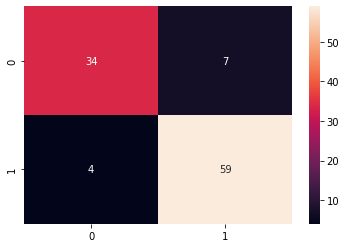

In [17]:
sb.heatmap(confusion_matrix(y_test, y_pred), annot = True)